# Growth word comparisons
In which we compare the methods of determining whether a word "grew" or not.

In [26]:
import pandas as pd
import sys
if('..' not in sys.path):
    sys.path.append('..')
from data_processing.data_handler import get_default_vocab
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [21]:
tf = pd.read_csv('../../data/frequency/2015_2016_tf_norm.tsv', sep='\t', index_col=0)
vocab = get_default_vocab()
tf = tf.loc[vocab]
tf.dropna(inplace=True)
tf_smooth = tf[tf > 0].min().min()
tf += tf_smooth

## Define different measures of growth

### Average of first and last months

Considering $n$ months total and $k$ months at the start and end, sort by $\frac{mean(f_{n-k:n})}{mean(f_{0:k})}$.

In [52]:
pd.set_option('display.max_rows', 2000)
k_range = range(1,6)
n = tf.shape[1]
all_tf_sorted = {}
all_tf_sorted_vals = {}
for k in k_range:
#     print('considering first and last %d months'%(k))
    tf_mean_0 = tf.ix[:,0:k].mean(axis=1)
    tf_mean_1 = tf.ix[:,n-k:].mean(axis=1)
    tf_mean_sorted = (tf_mean_1 / tf_mean_0).sort_values(inplace=False, ascending=False)
    all_tf_sorted['%d_words'%(k)] = tf_mean_sorted.index.tolist()
    all_tf_sorted_vals['%d_vals'%(k)] = tf_mean_sorted.values
all_tf_sorted = pd.DataFrame(all_tf_sorted)
all_tf_sorted_vals = pd.DataFrame(all_tf_sorted_vals)
all_tf_sorted = pd.concat([all_tf_sorted, all_tf_sorted_vals], axis=1)
all_cols = zip(['%d_words'%(k) for k in k_range], ['%d_vals'%(k) for k in k_range])
all_cols = list(reduce(lambda x,y: x+y, [[c1, c2] for c1, c2 in all_cols]))
all_tf_sorted_mean = all_tf_sorted[all_cols]
all_tf_sorted_mean

1_words       1_vals              2_words       2_vals  \
0                stellaris  4906.376686              carthus  1897.961858   
1                undertale  3381.958308             rashford  1198.353455   
2                  roadhog  2975.974327                nyami  1194.814204   
3                   cydney  2008.793671             astralis  1056.038134   
4                  carthus  1844.745051         phonebanking  1017.580440   
5                 rashford  1603.051183               cydney   980.093412   
6                   drumpf  1520.251932               drumpf   940.132398   
7                     zika  1150.612419               alphys   874.517416   
8                    nyami   890.277868            undertale   856.822280   
9                  dingler   822.525653              embered   734.916995   
10                  yachty   555.661045               grunil   730.877747   
11                astralis   554.238294                 zika   704.838367   
12                  grunil   526.415608              kallari   698.753065   
13                  alphys   521.846009            desiigner   667.687629   
14                  robigo   512.706810            stellaris   587.013196   
15                 zeruiah   501.282811               yachty   582.041222   
16                    grux   481.176574              zeruiah   547.799110   
17                 kallari   479.348734         creepymaiden   527.041058   
18              skillpower   470.209535               laslow   487.538098   
19              berniebots   469.292870              roadhog   455.526295   
20               desiigner   463.355136              dingler   447.154916   
21                  laslow   462.491503                  qgj   422.748874   
22                 bernout   402.122503              headzoo   411.492520   
23                 embered   383.303105            bradberry   407.164222   
24                 eileene   382.016265                 grux   406.047501   
25                    zven   371.467458           skillpower   397.407884   
26                 headzoo   350.029069              eileene   382.389659   
27                   aubry   335.827827           automatron   354.338381   
28                aldritch   325.246915               thesan   354.325004   
29                 possibe   313.830439               robigo   335.133966   
30                     qgj   312.360389                 zven   327.386358   
31            phonebanking   308.406930               farzen   325.723153   
32              automatron   301.858787                 dolk   316.690540   
33              shadowclaw   292.909076              megumin   316.624092   
34               berniebot   281.028117              bernout   312.693156   
35                   radra   257.723160                  pxc   305.273293   
36                   orsha   257.563357              colborn   297.491946   
37                 plumbus   256.809240                 bssb   293.441230   
38                   meren   252.696601              plumbus   287.080544   
39                 roastee   250.507614           magicforce   277.555372   
40                    bssb   242.186522              zellner   276.975445   
41                  fuchai   241.272602                orsha   267.658806   
42                   phinn   238.073883             westvale   262.128888   
43               bradberry   228.287908        boogeymonster   261.337195   
44           overdiscussed   225.574144           shadowclaw   257.177474   
45                 scanlan   218.262233                radra   246.096585   
46                    mozu   216.329941                avani   244.418229   
47                   lucio   208.658814                iudex   239.006945   
48                    zeru   204.039555               elneny   237.233312   
49                   saizo   203.497499                phinn   235.611659   
50                    dolk   196.490527        overdiscussed   234.905525   
51             

Non proper noun word counts (in top 1000):

$k=1$ ====> [roadhog, drumpf, berniebots, bernout, phonebanking, berniebot, roastee, overdiscussed, doggo, gradea, downticket, superdelegate, superdelegates, yuuuge, boogeymonster, schwifty, yuge, gope, waddup, shillary, idolizable, cryptokey, systemless, roomscale, unpledged, respeck, cummies, sandernistas, crybullies, cuckservative, unfavorability, trumpers, delegatesberners, shitsauce, untended, puppers, respek, descants, meirl, fyne, unfavorables, coolheaded, berning, caucused, cuboid, cuckservatives, caucuses, imprecation, hilldawg, berned, swifties, pupper, microencephaly, shwifty, cuck, nanoscience, whaddup, manhunts, nominee, funtime, smol, favorables, favoriability, brexit, lyin, doxing, cucks, poise, independents, noot, militarist, regressives, hilldog, presumptive, indicted, disavow, globalism, bernies, knawledge, delegate, unsubstantial, tankie, globalists, xenophobe, qotd]

$k=3$ ====> [drumpf, phonebanking, booklovers, berniebot, flowey, cryptokey, crybullies, roomscale, superdelegates, superdelegate, gope, abandonthread, ebookstore, superpredators, undomestic, shitsauce, descants, yuuuge, yuge, downballot, delegates, respeck, unpledged, coolheaded, shillary, superoht, waddup, trumpers, schmoop, doggo, cuboid, sandernistas, berners, caucused, plaidy, systemless, cowhorse, liming, untended, caucuses, hilldawg, unsubstantial, respek, brokered, meirl, tsawww, regressives, nanoscience, playspace, imprecation, shopaholic, puppers, unfavorables, cucks, swifties, lyin, disavow, delegate, unfavorability, cummies, anotha, berned, ]

$k=5$ ====> [drumpf, booklovers, overdiscussed, phonebanking, cryptokey, bernout, crybullies, birthmarked, undomestic, descants, mobilism, tronald, abandonthread, superpredators, downticket, badbadbad, japed, berniebot, gope, unpledged, berniebots, unnamable, systemless, yuuuge, paperbound, unpledged, respeck, provisioners, bathgate, coolheaded, shillary, yuge, musicophilia, superhot, laxness, shopaholic, ]

So using $k=5$ mainly extracts proper nouns.

### Filter by minimum frequency

In [54]:
min_tf = 1e-5
all_tf_sorted = {}
all_tf_sorted_vals = {}
for k in k_range:
#     print('considering first and last %d months'%(k))
    tf_mean_0 = tf.ix[:,0:k].mean(axis=1)
    tf_mean_1 = tf.ix[:,n-k:].mean(axis=1)
    tf_mean_sorted = (tf_mean_1 / tf_mean_0).sort_values(inplace=False, ascending=False)
    # filter by min tf
    tf_mean_sorted = tf_mean_sorted[tf_mean_1 >= min_tf]
    print('tf[%d:] has %d values above min %.3E'%(n-k, len(tf_mean_sorted), min_tf))
    all_tf_sorted['%d_words'%(k)] = tf_mean_sorted.index.tolist()
    all_tf_sorted_vals['%d_vals'%(k)] = tf_mean_sorted.values
# force all arrays to have same length
all_tf_sorted = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted.iteritems()))
all_tf_sorted.fillna(0, inplace=True)
all_tf_sorted_vals = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted_vals.iteritems()))
all_tf_sorted_vals.fillna(0, inplace=True)
all_tf_sorted = pd.concat([all_tf_sorted, all_tf_sorted_vals], axis=1)
all_cols = zip(['%d_words'%(k) for k in k_range], ['%d_vals'%(k) for k in k_range])
all_cols = list(reduce(lambda x,y: x+y, [[c1, c2] for c1, c2 in all_cols]))
all_tf_sorted_mean_tf_filter_tf = all_tf_sorted[all_cols]
all_tf_sorted_mean_tf_filter_tf

tf[11:] has 9436 values above min 1.000E-05
tf[10:] has 9407 values above min 1.000E-05
tf[9:] has 9412 values above min 1.000E-05
tf[8:] has 9468 values above min 1.000E-05
tf[7:] has 9514 values above min 1.000E-05


1_words       1_vals              2_words       2_vals  \
0               stellaris  4906.376686              carthus  1897.961858   
1               undertale  3381.958308             rashford  1198.353455   
2                 roadhog  2975.974327                nyami  1194.814204   
3                  cydney  2008.793671             astralis  1056.038134   
4                 carthus  1844.745051         phonebanking  1017.580440   
5                rashford  1603.051183               cydney   980.093412   
6                  drumpf  1520.251932               drumpf   940.132398   
7                    zika  1150.612419               alphys   874.517416   
8                   nyami   890.277868            undertale   856.822280   
9                 dingler   822.525653              embered   734.916995   
10                 yachty   555.661045               grunil   730.877747   
11               astralis   554.238294                 zika   704.838367   
12                 grunil   526.415608              kallari   698.753065   
13                 alphys   521.846009            desiigner   667.687629   
14                 robigo   512.706810            stellaris   587.013196   
15                zeruiah   501.282811               yachty   582.041222   
16                   grux   481.176574              zeruiah   547.799110   
17                kallari   479.348734         creepymaiden   527.041058   
18             skillpower   470.209535               laslow   487.538098   
19             berniebots   469.292870              roadhog   455.526295   
20              desiigner   463.355136              dingler   447.154916   
21                 laslow   462.491503                  qgj   422.748874   
22                bernout   402.122503              headzoo   411.492520   
23                embered   383.303105            bradberry   407.164222   
24                eileene   382.016265                 grux   406.047501   
25                   zven   371.467458           skillpower   397.407884   
26                headzoo   350.029069              eileene   382.389659   
27                  aubry   335.827827           automatron   354.338381   
28               aldritch   325.246915               thesan   354.325004   
29                possibe   313.830439               robigo   335.133966   
30                    qgj   312.360389                 zven   327.386358   
31           phonebanking   308.406930               farzen   325.723153   
32             automatron   301.858787                 dolk   316.690540   
33             shadowclaw   292.909076              megumin   316.624092   
34              berniebot   281.028117              bernout   312.693156   
35                  radra   257.723160                  pxc   305.273293   
36                  orsha   257.563357              colborn   297.491946   
37                plumbus   256.809240                 bssb   293.441230   
38                  meren   252.696601              plumbus   287.080544   
39                roastee   250.507614           magicforce   277.555372   
40                   bssb   242.186522              zellner   276.975445   
41                 fuchai   241.272602                orsha   267.658806   
42                  phinn   238.073883             westvale   262.128888   
43              bradberry   228.287908        boogeymonster   261.337195   
44          overdiscussed   225.574144           shadowclaw   257.177474   
45                scanlan   218.262233                radra   246.096585   
46                   mozu   216.329941                avani   244.418229   
47                  lucio   208.658814                iudex   239.006945   
48                   zeru   204.039555               elneny   237.233312   
49                  saizo   203.497499                phinn   235.611659   
50                   dolk   196.490527        overdiscussed   234.905525   
51                  doggo   195.987600             zipperer   230.

Increasing the min tf seems to get rid of the rare names but also some slang?

### Filter by unique subreddits
A lot of these growth words probably come from use in a particularly popular subreddit. Can we control for that by filtering for some minimum number of subreddits?

In [59]:
# further filter by unique subreddits?
sub_counts = pd.read_csv('../../data/frequency/2015_2016_subreddit_unique.tsv', sep='\t', index_col=0)
sub_counts = sub_counts.loc[tf.index.tolist()]
min_sub = 5
all_tf_sorted = {}
all_tf_sorted_vals = {}
for k in k_range:
#     print('considering first and last %d months'%(k))
    tf_mean_0 = tf.ix[:,0:k].mean(axis=1)
    tf_mean_1 = tf.ix[:,n-k:].mean(axis=1)
    tf_mean_sorted = (tf_mean_1 / tf_mean_0).sort_values(inplace=False, ascending=False)
    # filter by min tf
    tf_mean_sorted = tf_mean_sorted[tf_mean_1 >= min_tf]
    # filter by min sub
    sub_mean_1 = sub_counts.ix[tf_mean_sorted.index, n-k:].mean(axis=1)
    tf_mean_sorted = tf_mean_sorted[sub_mean_1 >= min_sub]
    print('tf[%d:] has %d values above min tf %.3E and min sub %d'%(n-k, len(tf_mean_sorted), min_tf, min_sub))
    all_tf_sorted['%d_words'%(k)] = tf_mean_sorted.index.tolist()
    all_tf_sorted_vals['%d_vals'%(k)] = tf_mean_sorted.values
# force all arrays to have same length
all_tf_sorted = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted.iteritems()))
all_tf_sorted.fillna(0, inplace=True)
all_tf_sorted_vals = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted_vals.iteritems()))
all_tf_sorted_vals.fillna(0, inplace=True)
all_tf_sorted = pd.concat([all_tf_sorted, all_tf_sorted_vals], axis=1)
all_cols = zip(['%d_words'%(k) for k in k_range], ['%d_vals'%(k) for k in k_range])
all_cols = list(reduce(lambda x,y: x+y, [[c1, c2] for c1, c2 in all_cols]))
all_tf_sorted_mean_tf_filter_sub = all_tf_sorted[all_cols]
all_tf_sorted_mean_tf_filter_sub

tf[11:] has 8713 values above min tf 1.000E-05 and min sub 5
tf[10:] has 8704 values above min tf 1.000E-05 and min sub 5
tf[9:] has 8844 values above min tf 1.000E-05 and min sub 5
tf[8:] has 9039 values above min tf 1.000E-05 and min sub 5
tf[7:] has 9109 values above min tf 1.000E-05 and min sub 5


1_words       1_vals              2_words       2_vals  \
0               stellaris  4906.376686              carthus  1897.961858   
1               undertale  3381.958308             rashford  1198.353455   
2                 roadhog  2975.974327             astralis  1056.038134   
3                  cydney  2008.793671         phonebanking  1017.580440   
4                 carthus  1844.745051               cydney   980.093412   
5                rashford  1603.051183               drumpf   940.132398   
6                  drumpf  1520.251932               alphys   874.517416   
7                    zika  1150.612419            undertale   856.822280   
8                  yachty   555.661045              embered   734.916995   
9                astralis   554.238294                 zika   704.838367   
10                 alphys   521.846009            desiigner   667.687629   
11                 robigo   512.706810            stellaris   587.013196   
12                zeruiah   501.282811               yachty   582.041222   
13             skillpower   470.209535               laslow   487.538098   
14             berniebots   469.292870              roadhog   455.526295   
15              desiigner   463.355136                  qgj   422.748874   
16                 laslow   462.491503            bradberry   407.164222   
17                bernout   402.122503           skillpower   397.407884   
18                embered   383.303105           automatron   354.338381   
19                   zven   371.467458               robigo   335.133966   
20                  aubry   335.827827                 zven   327.386358   
21               aldritch   325.246915              megumin   316.624092   
22                possibe   313.830439              bernout   312.693156   
23                    qgj   312.360389                  pxc   305.273293   
24           phonebanking   308.406930              plumbus   287.080544   
25             automatron   301.858787           magicforce   277.555372   
26             shadowclaw   292.909076              zellner   276.975445   
27              berniebot   281.028117             westvale   262.128888   
28                plumbus   256.809240        boogeymonster   261.337195   
29                  meren   252.696601           shadowclaw   257.177474   
30                roastee   250.507614                iudex   239.006945   
31                 fuchai   241.272602               elneny   237.233312   
32              bradberry   228.287908                aubry   224.753457   
33                scanlan   218.262233                cabba   218.906970   
34                   mozu   216.329941                 mozu   209.928778   
35                  lucio   208.658814                cubis   209.715103   
36                   zeru   204.039555                  zns   201.049158   
37                  saizo   203.497499              possibe   197.814852   
38                  doggo   195.987600            berniebot   192.165994   
39                 carroo   193.748768            darkscape   185.986994   
40                allanon   190.747598             aldritch   182.283189   
41             magicforce   188.265248               asriel   181.855630   
42                 asriel   184.698839              allanon   179.111942   
43                 gradea   174.863436               anyfin   164.720106   
44                  cubis   173.285548              halbach   158.177334   
45                    zns   171.541287       superdelegates   155.212417   
46                zellner   171.512436                 altp   153.775205   
47                  perkz   168.740764            fetterman   153.705392   
48                megumin   167.702051                cthun   152.961001   
49                colborn   162.439585               tunsil   148.901094   
50                 buting   160.569949               sterak   148.733556   
51             downticket   160.185876                 kody   144.

Non-proper noun word counts:

$k=1$ ====> []

$k=3$ ====> []

$k=5$ ====> [drumpf, bernout, crybullies, mobilism, superdelegates, superdelegate, tropisms, superpredators, downticket, resistible, berniebots, shitsauce, yuuuge, unpledged, scuffy, tittysprinkles, shillary, yuge, superhot, trumpers, waddup, franchiser, unequalled, ]

Where do actual growth words show up? E.g. `doggo`, `af`, `ghosting`, etc.

In [71]:
test_words = ['doggo', 'af', 'ghosting', 'adulting', 'cuck', 'tbh', 'lowkey', 'fam', 'cringy']
context_k = 5
k_1_words = set(all_tf_sorted_mean_tf_filter_sub['1_words'])
for w in test_words:
    print(w)
    if(w in k_1_words):
        w_idx = all_tf_sorted_mean_tf_filter_sub[all_tf_sorted_mean_tf_filter_sub['1_words'] == w].index.tolist()[0]
        print(all_tf_sorted_mean_tf_filter_sub.ix[w_idx-context_k:w_idx+context_k, '1_words'])

doggo
33       scanlan
34          mozu
35         lucio
36          zeru
37         saizo
38         doggo
39        carroo
40       allanon
41    magicforce
42        asriel
43        gradea
Name: 1_words, dtype: object
af
6156             lgw
6157          ariana
6158    overclockers
6159            fitz
6160          bougie
6161              af
6162          mereka
6163           jimin
6164             dri
6165            umbc
6166        bodysuit
Name: 1_words, dtype: object
ghosting
6851          cfop
6852         estou
6853       exempel
6854        polski
6855        thanos
6856      ghosting
6857         augie
6858     mccluster
6859      spielman
6860    cartoonist
6861         shiki
Name: 1_words, dtype: object
adulting
2292            amuro
2293         unsecure
2294         kunoichi
2295    todayilearned
2296            przed
2297         adulting
2298          nantuko
2299              vmf
2300              bbi
2301          kolarov
2302           gravis
Name: 1_words, dt

So the interesting words might have less obvious growth rates than the "high-growth" words. Maybe we just have to scroll through the top 10K words and pick out the non-proper nouns.

## Max of first months, min of last months
Considering $n$ months total and $k$ months at the start and end, sort by $\frac{max(f_{0:k})}{min(f_{n-k:n})}$.

In [56]:
pd.set_option('display.max_rows', 2000)
k_range = range(1,6)
n = tf.shape[1]
all_tf_sorted = {}
all_tf_sorted_vals = {}
for k in k_range:
#     print('considering first and last %d months'%(k))
    tf_max_0 = tf.ix[:,0:k].max(axis=1)
    tf_min_1 = tf.ix[:,n-k:].min(axis=1)
    tf_mean_sorted = (tf_min_1 / tf_max_0).sort_values(inplace=False, ascending=False)
    all_tf_sorted['%d_words'%(k)] = tf_mean_sorted.index.tolist()
    all_tf_sorted_vals['%d_vals'%(k)] = tf_mean_sorted.values
all_tf_sorted = pd.DataFrame(all_tf_sorted)
all_tf_sorted_vals = pd.DataFrame(all_tf_sorted_vals)
all_tf_sorted = pd.concat([all_tf_sorted, all_tf_sorted_vals], axis=1)
all_cols = zip(['%d_words'%(k) for k in k_range], ['%d_vals'%(k) for k in k_range])
all_cols = list(reduce(lambda x,y: x+y, [[c1, c2] for c1, c2 in all_cols]))
all_tf_sorted_min_max = all_tf_sorted[all_cols]
all_tf_sorted_min_max

1_words       1_vals                        2_words  \
0                stellaris  4906.376686                        carthus   
1                undertale  3381.958308                          nyami   
2                  roadhog  2975.974327                       rashford   
3                   cydney  2008.793671                         drumpf   
4                  carthus  1844.745051                         cydney   
5                 rashford  1603.051183                       astralis   
6                   drumpf  1520.251932                         grunil   
7                     zika  1150.612419                         alphys   
8                    nyami   890.277868                        zeruiah   
9                  dingler   822.525653                        kallari   
10                  yachty   555.661045                      desiigner   
11                astralis   554.238294                      undertale   
12                  grunil   526.415608                           zika   
13                  alphys   521.846009                        embered   
14                  robigo   512.706810                         laslow   
15                 zeruiah   501.282811                           grux   
16                    grux   481.176574                            qgj   
17                 kallari   479.348734                   phonebanking   
18              skillpower   470.209535                     automatron   
19              berniebots   469.292870                         yachty   
20               desiigner   463.355136                        bernout   
21                  laslow   462.491503                           bssb   
22                 bernout   402.122503                        headzoo   
23                 embered   383.303105                     skillpower   
24                 eileene   382.016265                      bradberry   
25                    zven   371.467458                          radra   
26                 headzoo   350.029069                          phinn   
27                   aubry   335.827827                         robigo   
28                aldritch   325.246915                     shadowclaw   
29                 possibe   313.830439                        dingler   
30                     qgj   312.360389                          orsha   
31            phonebanking   308.406930                           mozu   
32              automatron   301.858787                  overdiscussed   
33              shadowclaw   292.909076                       zipperer   
34               berniebot   281.028117                     magicforce   
35                   radra   257.723160                         thesan   
36                   orsha   257.563357                         asriel   
37                 plumbus   256.809240                          wizli   
38                   meren   252.696601                        eileene   
39                 roastee   250.507614                        zellner   
40                    bssb   242.186522                        megumin   
41                  fuchai   241.272602                       peltasta   
42                   phinn   238.073883                          cubis   
43               bradberry   228.287908                        colborn   
44           overdiscussed   225.574144                        plumbus   
45                 scanlan   218.262233                         farzen   
46                    mozu   216.329941                         elneny   
47                   lucio   208.658814                            zns   
48                    zeru   204.039555                          iudex   
49                   saizo   203.497499                      stellaris   
50                    dolk   196.490527                           dolk   
51                   doggo   195.987600                 superdelegates   
52                  carroo   193.748768                            pxc   
53                 alla

In [109]:
k_range = range(1,6)
n = tf.shape[1]
all_tf_sorted = {}
all_tf_sorted_vals = {}
min_tf = 1e-5
min_sub = 5
min_tf_mean = 1.
for k in k_range:
#     print('considering first and last %d months'%(k))
    tf_max_0 = tf.ix[:,0:k].max(axis=1)
    tf_min_1 = tf.ix[:,n-k:].min(axis=1)
    tf_mean_sorted = (tf_min_1 / tf_max_0).sort_values(inplace=False, ascending=False)
    # filter here for ratio > 1
    tf_mean_sorted = tf_mean_sorted[tf_mean_sorted > min_tf_mean]
    tf_mean_sorted = tf_mean_sorted[tf_mean_1.loc[tf_mean_sorted.index] >= min_tf]
    sub_mean_1 = sub_counts.ix[tf_mean_sorted.index, n-k:].mean(axis=1)
    tf_mean_sorted = tf_mean_sorted[sub_mean_1 >= min_sub]
    all_tf_sorted['%d_words'%(k)] = tf_mean_sorted.index.tolist()
    all_tf_sorted_vals['%d_vals'%(k)] = tf_mean_sorted.values
all_tf_sorted = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted.iteritems()))
all_tf_sorted.fillna(0, inplace=True)
all_tf_sorted_vals = pd.DataFrame(dict((k, pd.Series(v)) for k,v in all_tf_sorted_vals.iteritems()))
all_tf_sorted_vals.fillna(0, inplace=True)
all_tf_sorted = pd.concat([all_tf_sorted, all_tf_sorted_vals], axis=1)
all_cols = zip(['%d_words'%(k) for k in k_range], ['%d_vals'%(k) for k in k_range])
all_cols = list(reduce(lambda x,y: x+y, [[c1, c2] for c1, c2 in all_cols]))
all_tf_sorted_min_max_filter_tf = all_tf_sorted[all_cols]
all_tf_sorted_min_max_filter_tf

1_words     1_vals         2_words     2_vals          3_words  \
0              trump  31.465040         hillary  10.244717          hillary   
1            hillary  13.334068         clinton   9.232919          removed   
2            clinton  11.047849           trump   7.900336          clinton   
3             bernie   7.488384         removed   6.697115       supporters   
4            removed   7.031858      supporters   5.993835            trump   
5         supporters   6.908518          bernie   4.437986       nomination   
6             donald   6.728277      nomination   4.345413             cruz   
7         nomination   5.636570            cruz   3.959944           bernie   
8            sanders   5.429300         sanders   3.925022        supporter   
9               cruz   4.897862   establishment   3.611026    establishment   
10     establishment   4.122405       supporter   3.599001       convention   
11             polls   4.046741          voters   3.244607          sanders   
12         supporter   3.861186           polls   3.132943           voters   
13            voters   3.802044        election   3.036091           donald   
14         candidate   3.522539       candidate   3.017332       democratic   
15        convention   3.420512          donald   3.007716            polls   
16               fam   3.378378           voter   2.983182         election   
17          election   3.224154      convention   2.855441              fam   
18        democratic   3.139309      democratic   2.834607        democrats   
19               skt   3.036748             fam   2.664919           oculus   
20            reaper   3.016872    presidential   2.534403        candidate   
21             voter   2.983182       democrats   2.507835               vr   
22          democrat   2.877322        democrat   2.436787         democrat   
23             adams   2.872386        refugees   2.379639             rift   
24            rapist   2.853802          oculus   2.214563            voter   
25          refugees   2.846277             dex   2.195620     presidential   
26               gop   2.842445              vr   2.182596              fbi   
27      presidential   2.827822             gop   2.126881               sa   
28                kd   2.823500      candidates   2.077209           voting   
29         democrats   2.792048        campaign   2.068738             vote   
30          deadpool   2.718693            rift   2.011918         campaign   
31            bayern   2.610243          voting   2.009548       submission   
32             mercy   2.594129       elections   1.929155            obama   
33               fbi   2.466844         feature   1.925660          primary   
34            sharks   2.446895            vote   1.913711       settlement   
35               blm   2.444083      republican   1.912013            votes   
36        classified   2.421173        summoned   1.892959          muslims   
37        candidates   2.406518             fbi   1.873300        elections   
38               dex   2.383321       president   1.866693      progressive   
39        requesting   2.355844              sa   1.856971        president   
40             spurs   2.267940      settlement   1.847335           senate   
41              pens   2.236333      submission   1.827265              gop   
42            oculus   2.214563           votes   1.809742          headset   
43         president   2.196985     republicans   1.801337       republican   
44           feature   2.194780             str   1.791868            april   
45                vr   2.182596           shill   1.785661      republicans   
46        republican   2.169079             blm   1.766241             puck   
47           thunder   2.119697             ted   1.760084            fraud   
48          campaign   2.108584        shitpost   1.752471              ted   
49          summoned   2.061635            poll   1.737060     

Non-proper noun words (in top 1000):

$k=1$ ===> [drumpf, berniebots, bernout, roastee, overdiscussed, doggo, downticket, superdelegates, superdelegate, downballot, yuuuge, schwifty, yuge, gope, shillary, cryptokey, systemless, unpledged, respeck, cummies, sandernistas, crybullies, cuckservative, unfavorability, trumperse, berners, shitsauce, puppers, respek, meirl, coolheaded, berning, cuckservatives, caucuses, playspace, hilldawg, berned, swifties, pupper, microcephaly, schwifty, maga, cuck, tronald, guilter, nanoscience, whaddup, manhunts, funtime, smol, favorables, favorability, lyin, doxing, cucks, independents, noot, hilldog, presumptive, indicted, disavow, unduped, knawledge, delegate, unsubstantial, feelsbadman, cucked, feelsgoodman, tankie, hiltery, tsawww, globalists, precheck, yeb, xenophobe, qotd]

$k=3$ ===> [drumpf, automatron, bernout, phonebanking, berniebot, cryptokey, superdelegate, roomscale, superdelegates, downticket, crybullies, shitsauce, berniebots, yuge, delegates, coolheaded, trumpers, unpledged, berners, shillary, downballot, sandernistas, provisioners, caucuses, hilldawg, caucused, pupper, regressives, fyne, cucks, lyin, maga, systemless, meirl, doggo, nanoscience, unsubstantial, manhunts, disavow, swifties, microcephaly, unfavorables, hitlery, playspace, independents, imprecation, removed, btfo, puppers, pledged, globalists, kindred, arf, unfavorability, cucked, yeb, wewlad, iateacrayon, marketcap, globalism, amalgamates, matchmake, qotd, indicted, cuck, nominee, harrowed, supporters, discord, chaperone, stumping, superthread, unmastered, recalibration, mahunt, altspace, inserteres, cintipedes, pillager, cummies, favorability, militarist, caucusing, naded, digibro, primaries, ballots, precincts, anguished, automagically, disavowed, dollarydoos, cucking, anotha, uncommitted, lighthouses, berned, ransomware, flotus, brokered, surrogates, handmaid, primaried, guilters, obstructionism, inserter, nomination, demagogue, tbqh, initialisms, undecideds, disavowing, safehouse, hawkish, undemocratic, thwomp, cummy, canvassed, smol, favorables, regressive, supporter, moldering, naturopaths, feelsbadman, superpac, gfriend, interventionism, berning, tfm, halvening, diadem, canvass, impeachment, entomb, oathbreaker, obstructionist, safespace, valiance, dems, establishment, deliverer, indictment, disenfranchising, blowgun, interventionist, feelsgoodman, governorships, itemless, guilter, frisk, crosscheck, modmailing, modpost, goodjob]

$k=5$ ===> [cryptokey, crybullies, phonebanking, swifties, meirl, caucused, bernout, regressives, superdelegate, trumpers, shitsauce, hilldawg, nanoscience, yuuuge, caucusing, sandernistas, initialisms, unpledged, cummies, handmaid, deliverer, globalists, stumping, yeb, berned, fervor, gfriend, delegates, yuge, deskbot, incited, anotha, automagically, yourbrainonporn, gope, numbah, obstructionism, brokered, twisters, precincts, cucked, feelsgoodman, undecideds, antinatalism, regressive, unfavorability, indict, canvassers, hitlery, nomination, cucks, hilldog, lowlights, independents, berns, flopper, establishment, canvassing, cucking, depositions, moshpit, transcripts, endorses, pupper, goodjob, bern, supporters, exoneration, peddler, bussy, deacon, precinct, doggo, schmeckles, settlement, superpacs, haymaker, presidency, occultist, homeward, unsealing, pomodoro, fbi, surrogates, tankies, nominees, friendo, qotd, sanctuary, refillable, lighthouses, badman, honeymooned, deforest, deportations, airball, diligent, paleontology, millenial, chainsmokers, safespace, viewbotting, downclocking, billings, androgyny, feelsbadman, adulting, dabbing, tiddies, swabs, sleuth, sandinistas, reapproved, crosscheck, rancor, manhunt, cuckservatives, pollster, electability, supporter, amity, antiquarian, demagogues, untagged, endorsing, tbqh, hypebeast, cinders, uncommitted, bodying governors, berning, proposals, pragmatist, obstructionists, populists, endorsed, warhawk, indictment, labbing, goaltend, vacancy, twinned]

Next step: go through the top 10K words for the $k=3$ category which seems to be the most productive?

In [107]:
k_3_list = all_tf_sorted_min_max_filter_tf['3_words'][all_tf_sorted_min_max_filter_tf['3_words'] != 0].tolist()
print(len(k_3_list))
print('\n'.join(k_3_list))

9199
rashford
drumpf
astralis
alphys
undertale
zika
qgj
automatron
cydney
desiigner
bernout
thesan
skillpower
phonebanking
colborn
zellner
cubis
elneny
shadowclaw
magicforce
yachty
phinn
goodneighbor
laslow
allanon
robigo
westvale
pxc
pyrocynical
orsha
megumin
boogeymonster
berniebot
meren
plumbus
flowey
zven
mendini
cabba
buting
bradberry
shinjuu
cryptokey
snowdin
halbach
saizo
fuchai
dz
megalovania
superdelegate
ogw
roomscale
joja
stardew
opx
kalitas
hield
superdelegates
victoriam
strahd
lenk
downticket
crybullies
aubry
whitehair
vatrano
mumen
bowblade
minilogue
teebo
gabbard
asriel
darkscape
livius
mediah
rakugo
anyfin
gope
kilgrave
rouche
heidel
blorg
jihn
imt
dardoch
gaster
shitsauce
lourlo
poggle
canova
manitowoc
berniebots
tachanka
darkzone
bellus
iudex
alecia
mutz
cucu
roadhog
fotp
abdeslam
superpredators
eeth
skyjacked
newke
quetz
thunderlords
tvos
tunsil
wentz
monaka
mozu
yuge
kratz
carthus
quetzals
faeria
kfm
delegates
sedol
aqours
karlov
zootopia
rambis
altp
ktos
wdb
yuuuge

Non-proper noun words (that are probably slang):

$k=3$ ===> [drumpf, automatron, bernout, phonebanking, berniebot, cryptokey, superdelegate, roomscale, superdelegates, downticket, crybullies, shitsauce, berniebots, yuge, delegates, coolheaded, trumpers, unpledged, berners, shillary, downballot, sandernistas, provisioners, caucuses, hilldawg, caucused, pupper, regressives, fyne, cucks, lyin, maga, systemless, meirl, doggo, nanoscience, unsubstantial, manhunts, disavow, swifties, microcephaly, unfavorables, hitlery, playspace, independents, imprecation, removed, btfo, puppers, pledged, globalists, kindred, arf, unfavorability, cucked, yeb, wewlad, iateacrayon, marketcap, globalism, amalgamates, matchmake, qotd, indicted, cuck, nominee, harrowed, supporters, discord, chaperone, stumping, superthread, unmastered, recalibration, mahunt, altspace, inserteres, cintipedes, pillager, cummies, favorability, militarist, caucusing, naded, digibro, primaries, ballots, precincts, anguished, automagically, disavowed, dollarydoos, cucking, anotha, uncommitted, lighthouses, berned, ransomware, flotus, brokered, surrogates, handmaid, primaried, guilters, obstructionism, inserter, nomination, demagogue, tbqh, initialisms, undecideds, disavowing, safehouse, hawkish, undemocratic, thwomp, cummy, canvassed, smol, favorables, regressive, supporter, moldering, naturopaths, feelsbadman, superpac, gfriend, interventionism, berning, tfm, halvening, diadem, canvass, impeachment, entomb, oathbreaker, obstructionist, safespace, valiance, dems, establishment, deliverer, indictment, disenfranchising, blowgun, interventionist, feelsgoodman, governorships, itemless, guilter, frisk, crosscheck, modmailing, modpost, goodjob, recalibrating, turnout, unraid, schmeckles, safehouse, resubmitting, adulting, cuckoldry, squanch, outspent, naturopathy, locomotion, centipede, xenophobe, impeached, polling, presumptive, millenials, neocon, disenfranchise, millennial, scrounger, fervor, mlem, quantums, querious, spiritualist, sorties, cuckservatives, photogrammetry, underoos, canvassers, harvesters, tankies, millenial, grog, definer, moonshot, obstructionists, unaffiliated, revote, supercell, islamaphobe, ascendancy, nonviable, vday, ftt, lowlights, edgelord, honeymooned, incels, birther, flopper, stumper, goodman, speedster, metahuman, cultivators, devotions, postmates, memery, numbah, islamaphobic, cultivator, sharts, astroturfers, brownshirts, disenfranchisement, tbt, tld, brolly, outspending, respek, pollsters, pollster, twisters, rift, waterboarding, isolationist, otps, campaigner, suiciders, succ, xans, wowie, overstays, entombed, turnouts, collectivist, islamophobic, gaffe, tamest, reclass, smartthings, overperformed, friendo, streamable, birthright, dispel, unifier, lowkey, incursion, tmw, fsil, twinned, madman, delinquents, neoliberal, dupa, asst, reclassed, clinched, centrism, vetting, magnate, neoconservatism, pacifist, islamophobia, reqs, tronald, secretary, quixotic, synthwave, sharia, superlist, socketing, unfavorable, rq, pmr, vlogs, wonk, lul, gaffs, edgelords, electioneering, wog, shippers, deforest, neocons, tiddies, monarchs, neoliberals, measurables, progressives, skulked, exhumed, helmetless, isolationism, settlements, navigator, constitutionalist, cellspot, covetous, overperform, buckaroo, pulsed, mathematically, collectivists, infuse, suppression, bussy, plurality, campaigned, assemblers, refillable, deport, pandered, homeward, outshot, deportations, billings, remittances, memeing, moshpit, acceptances, adventurism, centrists, deconstructed, confessionals, powerplays, trundle, expediency, demagogues, microdose, depositions, ascendency, clinch, corporatist, impeach, appoint, ultralight, peekers, uncounted, untagged, theocrat, scavenging, floof, shitshow, islamaphobia, statewide, impersonates, boop, labbing, repub, headsetes, blowout, bby, vetted, stumped, mudslinging, stonewalled, staffers, hapa, microdosing, ruinous, meming, muslims, frontside, zuck, softbanned, buildable, sans, homebuyers, maw, progressive, sifter, hussy, gotchu, pander, testimonials, proposals, provisional, occultist, beholden, rightward, bottlers, berried, libtards, slanders, dabbing, killcam, trouncing, protectionism, mittens, stunners, overturn, admonished, kindled, pandering, nonparitsan, overheal, corporatists, homemaker, lobbyist, recalibrated, unfavorably, expedient, leftists, conservatism, snek, giga, disaffected, frontrunners, populists, illiberal, safespot, quippy, defeatism, freeform, rushers, ghosted, trounced, bullshittery, cackle, resettlement, screencapping, soundbytes, sainz, pauper, tidings, semblances, androgyny, funtime, realness, mutualism, electability, wonks, islamization, oligarchic, upscaled, coronation, viewbotting, evangelicals, joyless, protectionist, despotic, deporting, islamists, neoliberalism, individualist, xenophobes, demagoguery, waterboard, populism, globalization, datapoints, tallies, hypebeast, bodying, deports, congresspeople, uprise, memed, prehab, illegals, centrist, shambling, shipwrecked, unbidden, naturopathic, cholo, lmfaoo, shiptposting, mils, ultrawide, appropriations, memester, premades, islamophobes, bipartisanship, botters, unopposed, coachable, superstate, ineligible, bricking, deductibles, insinuations, crossplay, listeners, clobbered, rumbler, tiller, cammer, fathead, goon, islams, nonwhite, crony, pardoning, corrupting, debuffing, firming, rigged, evils, deadass, pragmatist, cultivation, congressperson, quaking, subunit, barbs, killshot, grassroot, shilling, run, goaltend, frontload, requesting, frontliner, divisive, repudiate, bluster, leninism, memes, wigglers, escalations, substantive, roadblock, whelmed, unhinged, principled, antiwar, tireless, fundraisers, apportioned, seated, desoldering, handily, boops, shitpost, rightwing, underperformed, boutta, clinches, goalpost, mishandle, psychs, counterterrorism, incel, gopers, siophoned, bms, disillusion, inapplicable, unbound, seedlings, dissociatives, reorient, backcheck, hexing, af, shitposted, unifying, floozies, dogshit, bourgeoisie, unfuckable, dogwhistle, sexting, rehosted, cackles, erased, congeniality, progressivism, yolos, flashpoint, resilience, incendiary, socialism, audited, blowouts, constituents, trustworthiness, outscoring, unviable, antinatalist, persuader, muncher, telegram, indciting, opioid, collectivism, favelas, pundits, demoralize, unqualified, gridlocked, soundbite, solicitation, procrastinated, filings, resoundingly, youtubers, droprate, goaltending, dancehall, a leftism, oversharing, goofs, proletarian, contrivances, genociding, skools, grailed, rubes, backported, unseasonably, outperformed, mischaracterized, authoritarian, pastafarian, influencers, stimmed, viewbots, commodified, proportional, screentime, stranglehold, sideloading, desolder, hypebeasts, nakedly, wehraboo, wahhabist, authenticator, orator, critchance, cuckolds, dispels, incumbents, cuckold, sideloaded, medkit, softies, resistible, degenerate, hunty, twinks, extractors, oligarchies, hitcount, shakeup, blathers, ideologically, lmaoo, dispelling, sawk, pragmatism, hispanics, repudiation, courting, refugee, headshot, elites, sublets, overstayed, favorable, alarmism, subcommittee, mischaracterization, duopoly, settler, botting, ballistic, islamist, roamer, cringy, shadowboxing, repealing, energized, vlog, breakpoint, coalesced, sunless, beatdown, randos, droprates, duped, trending, overstaya, sandbagging, opioids, materialist, jfc, bygone, delegitimize, destabilizes, peerless, farmable, pushback, cancerous, damning, daypack, unprecedented, globalized, artisans, earthers, snarking, senile, fingerprinting, relight, muzzies, jest, smear, spinned, wth, individualists, partisanships, impropriety, copped, pking, homebrewed, nevermore, clickbaity, vlogging, platinumed, lmfaoo, lmfaooo, flocked, submitting, egoist, adlib, csateism, emplacement, shreds, regressed, shadiness, boi, checkpoint, ultrawides, idealists, insurmountable, unbuffed, unilaterally, toot, plutocratic, setlists, lobbied, advocated, smh, gamethread, grandbaby, beep, toot, disiparaged, realign, hijabs, plucky, debuffs, blendable, shd, stickered, paywall, headscarf, xenophobic, disruptors, leninists, lesion, stagecoach, rook, overt, digestives, yaas, likability, fascist, immunotherapy, reactivity, spawners, siphon, narrative, broadside, prodrug, underperformers, maoist, recomping, stickered, tbh, islamic, selfless, spacey, superweapon, tiering, veers, indomitable, debuting, nuance, evangelicalism, airburst, trounce, nonstarter, runts, viewbot, shill, clinching, credentialed, underling, sandbag, extrajudicial, stanning, islamism, trappy, overperforming, slimeball, conning, compositor, oneshots, spiciest, cringiest, schizoid, unseat, unconsoled, coasted, shortlisted, obstructing, disastrous, binging, deathblow, roundtable, globalist, anecdotally, combatting, infractions, balloting, eligibility, clowned, pucked, sloshing, speedwork, crestfallen, transcending, forecasts, obstructive, nibs, ragequitting, canvasing, uncompromising, charismatic, unamerican, conjugate, vowing, savage, yt, quintessentially, outsized, angelic, blustery, alienating, savescum, roadshow, bralettes, dismissiveness, dicked, deadlock, het, syndicalism, unlikable, intersectional, crit, emojis, chintzy, scrappers, loool, polarizing, pullback, minmaxing, disincentives, passthrough, untruth, decarbed, emitters, couts, shitshows, peddled, novelizations, repeals, socialist, reverb, unironically, youtuber, articulates, overstuffed, squatty, radicalize, triggered, semetic, lethality, cultivars, jarringly, blunders, lmfaooo, dabbed, bookmarked, werk, porosity, beatable, dispersion, underperformance, meme, cronies, disasterous, yaaas, werk, nonwhites, rallying, fradulent, fanarts, comeup, trended, getter, streamables, fascism, crieky, sparker, impactful, subverting, knockdown, uppers, conniving, smelter, deported, adlibs, tacticals, deportation, deconstructing, novelization, conservatism, xenophobia, uncharismatic, futurology, purp, hellscape, postcolonial, neurogenesis, dolts, strafed, brutalism, ablation, shitposters, flopping, mooks, muling, drawstrings, expansionism, nghtmre, baity, jabronis, unbiased, unpopoularity, iamverysmart, deflections, ragdolled, twister, exmuslim, gobsmacked, husbando, forgetti, overlevel, fuckery, savagery, imao, destress, vigorous, grizzled, sweats, yass, uncrackable, irredeemable, havling, galvanizing, buzzy, resubmitted, unlovable, bombastic, tankier, undercosted, courtly, superpowered, misremembering, slayed, rigging, verbiage, undereye, instakilled, transness, counterable, overextend, abjectly, chummy, murdery, uninformed, whittle, plumping, buoyed, capitalistic, fucc, hamfisted, operatives, dimming, bourgeois, monomyth, outperforming, thrifted, winnable, disjointed, mollys, chum, lmao, uncharged, randoms, lwed, trashing, codependent, adoptable, ubering, flowy, foment, antagonistic, lit, daaamn, smearing, misspoke, generational, banrate, scaremongering, punditry, poots, synergized, packable, antifa, rt, nimby, damnn, scattershot, runtimes, unwatchable, tdis, regressing, blitzers, duplicitous, energizes, pasting, mooch, dgaf, walled, prescient, smth, thta, crypto, loosies, multiversal, counterattack, ripostes, empowerment, lineups, megalomaniac, uplifted, downrange, libs, showman, spammer, huuuge, unironic, likeability, headcanon, headcannon, trynna, scanlations, hapas, yasss, bpd, blowhard, untrustworthy, thumper, reignited, narcissist, opportunistic, nutted, shtick, forgettable, thumper, shoehorned, netted, appart, platitudes, bullish, tropey, factually, inshallah, libertarian, preciate, flummoxed, spoonfed, hotseat, backfires, irrelevancy, enfeeble, belters, neurosurgery, despises, accosting, discontinuity, conspiratorial, gaslighted, contextualizing, grinded, frackers, emo, krazy, illicitly, incentivising, perf, fanatically, handholding, eviscerated, fml, splashy, bungling, pourover, brainier, insufflated, shitbot, procrastination, queueing, eta, ruff, underselling, yas, pussys, slapper, wobbling, underprepared, goaded, edgy, wfh, roamers, defeatist, weaponised, multikills, discombobulated, worldbuilding, misrepresentations, cringefest, defo, bling, overstated, autism, manhandled, unkillable, blowback, devolving, boggling, hotbeds, earworm, choreo, peeped, oneshotting, railed, fuckkk, booky, smd, mansplaining, edgey, comedown, spunky, yknow, railroaded, minimax, underrepresented, whitesplaining, manip, dicker, opportunism, diffs, tweek, droned, attackspeed, jags, shadiest, recked, shills, rootin, wutface, smthing, grind, glaringly, incompetency, outlandish, automod, nonbinary, bbe, eyeroll, suicided, shitfest, trekking, fuc, gurl, floofy, tweets, braggadocio, flubbed, panpour, hilter, unwearable, slabbed, squandered, hyperfocus, shredding, cakey, worlders, maddening, dingleberry, chapped, fucko, depersonalization, pinchy, unlistenable, supersampling, fandoms, spews, quranic, dialectic, typings, huuge, dumpstered, collabs, outdamage, lvling, unfucked, whitelisting, multikill, semitism, supps, soundscapes, swingy, grabbers, throughput, fellate, memetic, percs, gtfoh]

## Similarity to actual slang trajectories
Similar to trajectories from actual slang adoption, e.g. $af$, $ghosting$, etc.

In [ ]:
known_slang = ['af', 'cuck', 'ghosted', 'adulting', 'rn', 'tbh', 'doggo', 'fam', 'lowkey', 'cringey']
plt.figure(figsize=(5,5))

## Early frequency + Spearman's correlation
In which we try to find new words based on low early frequency and high Spearman's correlation coefficient (based on [this](http://publications.aston.ac.uk/28001/1/ELL_078_Grieve_Nini_Guo_final.pdf)).

In [87]:
# use precomputed tf norm correlations
tf_correls = pd.read_csv('../../data/frequency/2015_2016_tf_norm_correls.tsv', sep='\t', index_col=0)
combined_vocab = list(set(tf_correls.index) & set(tf.index))
tf_correl_percentiles = [75, 80, 85, 90]
tf_correl_lower_bounds = [pd.np.percentile(tf_correls['correl'], p) for p in tf_correl_percentiles]
# try first three months
k=3
tf_mean_1 = tf.ix[:,0:k].mean(axis=1)
tf_percentiles = [5, 10, 15, 20]
tf_upper_bounds = [pd.np.percentile(tf_mean_1, p) for p in tf_percentiles]
for tf_correl_lower_bound in tf_correl_lower_bounds:
    for tf_upper_bound in tf_upper_bounds:
        
        relevant_vocab = set(tf_mean_1[(tf_mean_1 < tf_upper_bound)].index)
        relevant_vocab = list(relevant_vocab & set(tf_correls[tf_correls['correl'] >= tf_correl_lower_bound].index))
#         relevant_vocab = tf_mean_1[(tf_mean_1 < tf_upper_bound)]
        vocab_sample = pd.np.random.choice(relevant_vocab, 10, replace=False)
        print('correl >= %.3f and $f_{0:%d}$ < %.3E got %d vocab => %s'%
              (tf_correl_lower_bound, k, tf_upper_bound, len(relevant_vocab), vocab_sample))

correl >= 0.301 and $f_{0:3}$ < 1.090E-07 got 2945 vocab => ['pulan' 'perlmutter' 'byun' 'boeheim' 'jost' 'stormcallers' 'superqueen'
 'dulac' 'kiernan' 'onegin']
correl >= 0.301 and $f_{0:3}$ < 1.361E-07 got 4793 vocab => ['carman' 'gmrs' 'hil' 'quantums' 'ursus' 'counterintelligence' 'tpo'
 'nikt' 'beiorg' 'cuav']
correl >= 0.301 and $f_{0:3}$ < 1.575E-07 got 6035 vocab => ['inkheart' 'demers' 'sweatfest' 'magnolias' 'animalfarm' 'brightstone'
 'naitch' 'minimises' 'latins' 'candide']
correl >= 0.301 and $f_{0:3}$ < 1.809E-07 got 7112 vocab => ['crean' 'singal' 'sandbagged' 'pinewood' 'cellspot' 'diu' 'fastidious'
 'samoas' 'lundy' 'jok']
correl >= 0.392 and $f_{0:3}$ < 1.090E-07 got 2512 vocab => ['anotha' 'andrighetto' 'ragland' 'theocrat' 'taoiseach' 'disrupters'
 'scea' 'galuf' 'laing' 'opx']
correl >= 0.392 and $f_{0:3}$ < 1.361E-07 got 3991 vocab => ['raclette' 'nici' 'poneglyph' 'sorcere' 'mollys' 'pharo' 'filebot'
 'warmaster' 'bartkowski' 'furret']
correl >= 0.392 and $f_{0:

Let's try the most restrictive combination first, then expand as necessary.

In [90]:
tf_upper_bound = 1.09e-7
tf_correl_lower_bound = 0.594
relevant_vocab_1 = list(set(tf_mean_1[tf_mean_1 < tf_upper_bound].index) & 
                      set(tf_correls[tf_correls['correl'] >= tf_correl_lower_bound].index))
print(relevant_vocab_1)

['penelo', 'mechanicum', 'hatr', 'drumpf', 'nimica', 'uldaman', 'uuvo', 'lora', 'dwti', 'simulor', 'canvasing', 'digix', 'unsworth', 'cmg', 'razem', 'winkeyless', 'dreamstate', 'usbc', 'seeley', 'dardoch', 'tachanka', 'mogs', 'fuga', 'nez', 'cocytus', 'womble', 'herk', 'rakugo', 'aubry', 'leitmotif', 'dore', 'activi', 'wdb', 'guus', 'glb', 'mashu', 'precip', 'omas', 'julianos', 'hilldog', 'drf', 'booped', 'shadowhunters', 'clockblocker', 'graceling', 'haman', 'santini', 'zoia', 'mattias', 'blathers', 'faeria', 'shardlake', 'atium', 'speedroid', 'hillarys', 'mlem', 'vpr', 'berned', 'rockefellers', 'recep', 'shieva', 'declassify', 'vermonters', 'raoh', 'yoshiyuki', 'novik', 'iudex', 'pamuk', 'uag', 'blacksite', 'hamonic', 'kallari', 'czyli', 'przy', 'atreus', 'adventurism', 'pizzi', 'rhobh', 'pablos', 'bbmc', 'akechi', 'eprom', 'pandya', 'wknd', 'delong', 'warchest', 'waarom', 'profaned', 'homebuyers', 'vezi', 'aduriz', 'teebo', 'uoc', 'voidling', 'tishu', 'imt', 'inai', 'reentered', 'ts

Non-proper noun words:

[drumpf, canvasing, dreamstate, hilldog, booped, precip, blathers, mlem, berned, declassify, adventurism, , reentered, tsawww, tarrifs, overdiscussed, pastafarians, unpledged, footfalls, girlz, antinatalist, dups, knawledge, guilter, marketcap, deforest, prefaces, motherships, hollers, expedience, islamaphobe, yolos, hiltery, goaltend, wewlad, safespace, shadowboxing, shitsauce, unifier, crashlands, deadass, abjectly, postcolonial, underoos, uncrackable, brobots, impersonates, hafa, unduped, outspending, bodying, downballot, favorables, berniebots, fucc, antiquarian, nakedly, airbnbs, muzzies, pillager, unmastered, electorally, schmeckles, poling, crosscheck, superthread, socketing, berns, primaried, disavows, systemless, incivility, overlanding, sysupdater, commodified, broo, nativism, murked, counterpunch, overbought, nands, trumpers, disenfranchises, cuckservatives, grassroot, abetted, doggo, reallocating, unseasonably, deciders, berners, respek, memetics, uncharismatic, milord, brolly, drawstrings, overstays, chairlift, tronald, regressives, obstructionists, gope, methylated, quippy, hypebeasts, roomscale, neoconservatism, packable, unfavorability, unstickied, theocrat, casteism, incrimination, untended, undereyes, unsubstantial, philandering, xans, minimax, effusive, resistible, caucusing, nanoscience, hopefulness, superstate, prodrug, anotha, convolutional, postmarked, egret, blustery, militarist, raagdolled, bernout, minks, berning, yuge, smol, berniebot, stenographer, playspace, naturopath, naturopaths, reraise, flotus, balloting, memery, handmaid, frontload, listers, overperform, whitesplaining, quantums, acks, succotash, unsealing, soundbytes, delegatoins, puppers, naded, phonebanking, ]

Let's relax the Spearman correlation lower bound.

In [92]:
tf_upper_bound = 1.09e-7
tf_correl_lower_bound = 0.490
relevant_vocab_2 = (set(tf_mean_1[tf_mean_1 < tf_upper_bound].index) & 
                    set(tf_correls[tf_correls['correl'] >= tf_correl_lower_bound].index))
relevant_vocab_2 = list(relevant_vocab_2 - set(relevant_vocab_1))
print(relevant_vocab_2)

['hefur', 'cian', 'savescumming', 'barbatos', 'aldritch', 'seulgi', 'byun', 'cfe', 'rsvce', 'desdemona', 'afrikaner', 'quaran', 'mylo', 'akhamamir', 'starports', 'scarlets', 'ftd', 'guptill', 'odmah', 'domingue', 'kcm', 'dullahan', 'helmetless', 'digivolve', 'hutrep', 'mineman', 'sheiva', 'altspace', 'gue', 'hogshead', 'marra', 'intensification', 'dupa', 'lise', 'lumiel', 'buxx', 'zn', 'scea', 'nait', 'nige', 'mahfouz', 'newui', 'asriel', 'mochizuki', 'katars', 'palpy', 'hiryu', 'rocher', 'krig', 'fossoway', 'datapad', 'pickable', 'thruxton', 'pucapoints', 'pavise', 'sfgate', 'atem', 'sexo', 'cultivators', 'stancu', 'beamdog', 'mccloskey', 'dutchy', 'matsuo', 'richelle', 'telesco', 'bundys', 'kurosaki', 'gaster', 'ougi', 'drakon', 'gildong', 'cadmus', 'suicider', 'janny', 'veterancy', 'nuevas', 'rinkah', 'avonlea', 'maxon', 'tanizaki', 'isak', 'alphys', 'dazes', 'kraus', 'peale', 'salaf', 'gowdy', 'zirconium', 'neruda', 'kody', 'ulb', 'trollope', 'anomalisa', 'novia', 'goodneighbor', '

Non-proper noun words:

[helmetless, savescumming, altspace, pickable, cultivators, dutchy, mispoke, hubspot, pigsty, arranger, veterancy, factotum, untimed, unconsoled, overperformed, savescum, tooty, telegrams, muling, transgressing, fatalist, riotous, powerplays, systolic, provisioner, inducer, amalgamate, disrupters, fuckyou, homozygous, scrounger, digestives, cellspot, flappers, epithelial, fatalist, squaddie, cuckhold]

Now let's further relax the frequency threshold.

In [94]:
tf_upper_bound = 1.361e-7
tf_correl_lower_bound = 0.490
relevant_vocab_3 = (set(tf_mean_1[tf_mean_1 < tf_upper_bound].index) & 
                    set(tf_correls[tf_correls['correl'] >= tf_correl_lower_bound].index))
relevant_vocab_3 = list(relevant_vocab_3 - set(relevant_vocab_1) - set(relevant_vocab_2))
print(relevant_vocab_3)

['alipay', 'reactants', 'youmuu', 'yellowknife', 'osr', 'pide', 'collectivists', 'vezes', 'ferreira', 'dlo', 'cias', 'isolator', 'discombobulated', 'barkov', 'fredrik', 'shamble', 'misschien', 'panpour', 'yvr', 'nuzzled', 'mallex', 'zanpakutou', 'eisenhorn', 'ciudades', 'giantess', 'iskandar', 'seatgeek', 'wikidot', 'ospreay', 'polarizes', 'huma', 'demers', 'disso', 'manip', 'kudo', 'lipsyncing', 'misreporting', 'mainspring', 'blash', 'presales', 'nooit', 'guilters', 'kevyn', 'trigonometric', 'lrs', 'vasy', 'repacking', 'doku', 'pyraminx', 'disneys', 'unbans', 'embroider', 'reallocation', 'undeads', 'haida', 'drysuit', 'sterilise', 'magia', 'draken', 'fala', 'jarringly', 'jokinen', 'hyacinth', 'kazuma', 'glawk', 'wsw', 'haidt', 'wikihow', 'falwell', 'kozmos', 'martingale', 'devotions', 'zanima', 'uel', 'rosby', 'jokic', 'pmr', 'vitale', 'nortel', 'tartelette', 'basura', 'helwani', 'iperf', 'orwen', 'fiestas', 'teu', 'polybag', 'reddest', 'whap', 'arrowverse', 'acidosis', 'logmein', 'in

Non-proper noun words:

[reactants, collectivists, isolator, discombobulated, nuzzled, polarizes, manip, lip syncing, misreporting, trigonometric, repacking, whap, acidosis, initialisms, slabbed, crossrail, islams, trouncing, soundbyte, oversleeping, untangled, estrangement, unbidden, integrator, inequitable, fracked, fuckbois, loosies, summonable, nationhood, eccentrics, counterintelligence, bombast, berner, blustering, apportion, forgers, overtrain, denigrates, fah, datapoints, rabbithole, frameless, memester, frontliners, coagulate, accosting, blowgun, funnelled, lmfaoo, procedurals, jihadism, nonstarter, perjured, mythicals, mechanised, superlist, grandbaby, moonlights, unpromoted, multidisciplinary, embalmed, incels, husbandos, userprofile, immunotherapy, boomin, adlib, slurps, brownstone, stimmed, floozies, devastates, cheekily, awaking, incumbency, whaddup, killcams, snakey, leninists, upheavals, stanning, gfriend, antiwar, perturbator, integrative, sublets, memey, roughnecks, sibilant, realigning, reformulation, multilayered, bioload, sekrit, recalibrating, spiciest, nimbly, longneck, unflappable, recomping, anhydrous, coroutines, primitivism, oped, ammos, tesseracts, buoyed, outspent, theatrically, pedigrees, downclocking, mishandle, antinatalism, indieheads, scaleable, ciggies, coursers, involvements, disavowing, tierlist, retracing, eyestrain, sumptuous, softbanned, cyanobacteria, effector, recyclers, backdated, rearranges, soundcards, soldiered, evangelicalism, contestable, energizes, safespot, unfavored, pantsuit, revote, fluster, hoodrats, delerium, topographic, halfcourt, screencapping, repudiation, lulling, polypropylene, monomyth, galvanizing, dicker, scatterer, yday, sleuths, hatty, blackscreen, pinchy, pincushion, zoomies, caregiving, moviegoer, misreported, jurist, contrivances, underachieved, effectual, pastafarianism, opiod, transdermal, cummies, hammed, businessperson, multipart, insidiously, pepperspray, blendable, individualists, shillary, expropriated, beatdowns, misquotes, canvassed, readded, transducers, islamaphobic, prehab, semblances, astroturfers, fluoro, purps, colorscheme, counterterrorism, zapatistas, acquiescing, pikey, flyovers, unearthing, yaas, unsticky, meaningfulness, biebs, destabilizes, bottlers, ropey, volunteerism, funtime, zuck, weaponised, inheritor, rapidfire, nurtures, bitting, languished, downlow, wagged, lampooned, prioritises, debited, soopers, boutta, potentiates, drooped, faggoty, blockable, indicting, memelord, synergized, insufflation, pervading, confederalism, brushstrokes, recanting, consonance, unmissable, uncounted, desiccated, plumping, persuader, disqualifier, backlink, adlibs, courtly, ingrates, retrofits, genned, nooch, corporatists, masterworks, wowie, shortlisted, creamers, staffy, peeper, contortion, attesting, unfucked, mashers, crampons, sunnier, streamables, seaworthy, certitude, heartthrob, reconditioning, patois, guesthouse, percenter, presides, polarisation, misspeak, deflectors, isomers, berthing, reincarnating, prosecutes, subtheme, apportioned, unsuprassed, crosscut, colicky, geodes, semicircle, emulations, voluntarism, furrowing, observables]

Relax the Spearman coefficient?

In [257]:
tf_upper_bound = 1.361e-7
tf_correl_lower_bound = 0.392
relevant_vocab_4 = (set(tf_mean_1[tf_mean_1 < tf_upper_bound].index) & 
                    set(tf_correls[tf_correls['correl'] >= tf_correl_lower_bound].index))
relevant_vocab_4 = list(relevant_vocab_4 - set(relevant_vocab_1) - set(relevant_vocab_2) - set(relevant_vocab_3))
print(relevant_vocab_4)

['tendo', 'amerson', 'iskreno', 'ironweed', 'equalities', 'nightwood', 'whitout', 'plenary', 'eerste', 'adhesions', 'feminizing', 'hamsik', 'cardioid', 'inara', 'jednu', 'clementines', 'finnegans', 'isas', 'bakken', 'greymon', 'sunlit', 'rifters', 'geranium', 'hahhahaha', 'inis', 'internetisbeautiful', 'intrests', 'heyguys', 'shmi', 'vei', 'bellus', 'tympole', 'alluc', 'pple', 'isfjs', 'dommes', 'neuf', 'jera', 'kelsier', 'gideons', 'overdrafts', 'tituba', 'stribling', 'filers', 'blume', 'icac', 'candide', 'buchi', 'carman', 'escribe', 'pendergast', 'preschools', 'housman', 'snowdin', 'gjonaj', 'cmw', 'eldora', 'bloatfly', 'airgun', 'unwearable', 'charcandrick', 'longfellow', 'subpixel', 'honore', 'ilford', 'seddon', 'bernanos', 'jailbreakable', 'rdsalute', 'cfx', 'vivillion', 'kaspar', 'redial', 'lstm', 'sideous', 'holocrons', 'bda', 'deduplication', 'unmirrored', 'waffe', 'sappho', 'kuu', 'kantor', 'zakum', 'rosholt', 'ovations', 'dauphin', 'alysanne', 'fujiwara', 'svih', 'meb', 'the

Non-proper noun words:

[tendo, equalities, whitout, plenary, adhesions, feminizing, sunlit, hahhahaha, internetisbeautiful, intrests, heyguys, pple, isfjs, overdrafts, isfjs, filers, dommes, filers, preschools, icac, airgun, unwearable, subpixel, jailbreakable, redial, lstm, bda, deduplication, unmirrored, ovations, medschool, shoulds, opticians, discontinuous, unbias, hapiness, bused, confidante, dyslexics, grandmom, dropshipping, laboured, headscarves, mesmerize, superqueen, panted, anglerfish, plinth, dimmable, reprimands, snacky, intransigent, intimating, mesmerize, stockbroker, thoroughly, vainly, foreshortening, jailers, segmenting, putback, rerunning, scoresheet, chicky, farmhand, trama, recked, relegates, ghosty, multikills, resettling, oversubscribed, uncured, flowey, squanch, multikill, unfailingly, skidrow, epicurean, cloister, quickstep, fucksticks, teamkills, makepeace, srpgs, slithers, conection, hiting, funnelling, perhpas, stap, farmboy, incompressible, repeatably, bookmaker, conscientousness, reactant, expy, softshell, multiboxers, lbr, wowow, britpop, prattling, colorism, hitcount, repacked, safezone, thta, udf, gratefulness, explodey, neurodiversity, lacquered, intergovernmental, courseload, believeth, proced, trimesters, outshot, stationing, spergs, overmatch, pitiless, sinergy, rmv, fuckfuck, elopement, emplacement, anology, omf, qubits, irreverance, pragmatics, thoe, obviosuly, minimises, flexibly, beed, lumberyard, easyscape, cresting, roguish, nailbiter, dollarydoos, decongestant, nonmagical, eradicator, islamization, soneone, calamitous, estrogens, movembers, plaidy, reassessed, assinine, illicitly, nontoxic, injuried, imprecation, spellbinding, overemphasize, shieldbearer, twinky, unnamable, usurpation, diplopia, laconic, earings, scriptwriters, reattaching, underplaying, backpay, aviable, unhackable, underlay, backtracks, lifehacks, medpacks, novelizations, oligarchical, scrams, dines, draftable, entirity, saddly, dilettante, ayye, compy, huhu, dboy, facesitting, royalists, paean, possibe, halfhearted, camara, parlament, modmailing, veiling, glitzy, constabulary, brownstones, pewds, criminalizes, easterns, lacerate, updrafts, chalks]

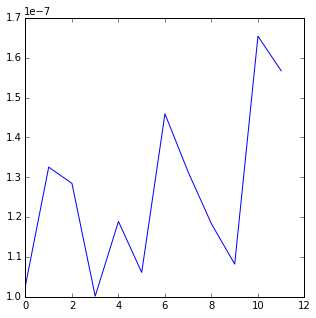

In [259]:
test_word = 'ransacking'
plt.figure(figsize=(5,5))
plt.plot(range(len(all_dates)), tf.loc[test_word])
plt.show()

## Growth word frequency visualization
In which we determine if past frequency/social/contextual diversity can predict future frequency in growth words based on graphs. Just like Altmann et al. 

In [110]:
growth_word_categories = pd.read_csv('../../data/metadata/growth_word_categories.csv')

In [111]:
growth_word_categories = pd.read_csv('../../data/metadata/growth_word_categories.csv')
growth_word_categories['words'] = growth_word_categories['words'].apply(lambda x: x.split('/'))
growth_words_manual = list(reduce(lambda x,y : x+y, growth_word_categories['words']))
print(growth_words_manual)

['af', 'asf', 'hella', 'lowkey', 'deadass', 'boutta', 'trynna', 'tbh', 'tbqh', 'ofc', 'waddup', 'whaddup', 'wowie', 'tmw', 'smh', 'smdh', 'gotchu', 'fam', 'tbf', 'hmu', 'jfc', 'wth', 'lmao', 'lmfaooo', 'lmfaoo', 'yas', 'yaas', 'yasss', 'tldw', 'imao', 'wht', 'daaamn', 'damnn', 'dgaf', 'fml', 'yknow', 'fuckyou', 'gtfoh', 'yday', 'cringey', 'cringy', 'cringiest', 'cringeworthy', 'whelmed', 'murdery', 'edgy', 'edgey', 'fucky', 'shambolic', 'chummy', 'lit', 'huuuge', 'yuge', 'yuuuge', 'perf', 'defo', 'pdq', 'rn', 'atm', 'hellscape', 'fuckery', 'fuck', 'cringefest', 'shitshow', 'shitshows', 'shitfest', 'bullshittery', 'shadiness', 'unfuck', 'unfucked', 'nonstarter', 'flopped', 'flubbing', 'overstuffed', 'smthing', 'superthread', 'modpost', 'stickied', 'unsticky', 'unstickied', 'untagged', 'screencapping', 'datapoints', 'bricking', 'cammer', 'firming', 'decrypting', 'sexting', 'rehosted', 'youtubers', 'resubmit', 'sideloading', 'sideload', 'droprates', 'vlogging', 'yt', 'mooks', 'reupload', 

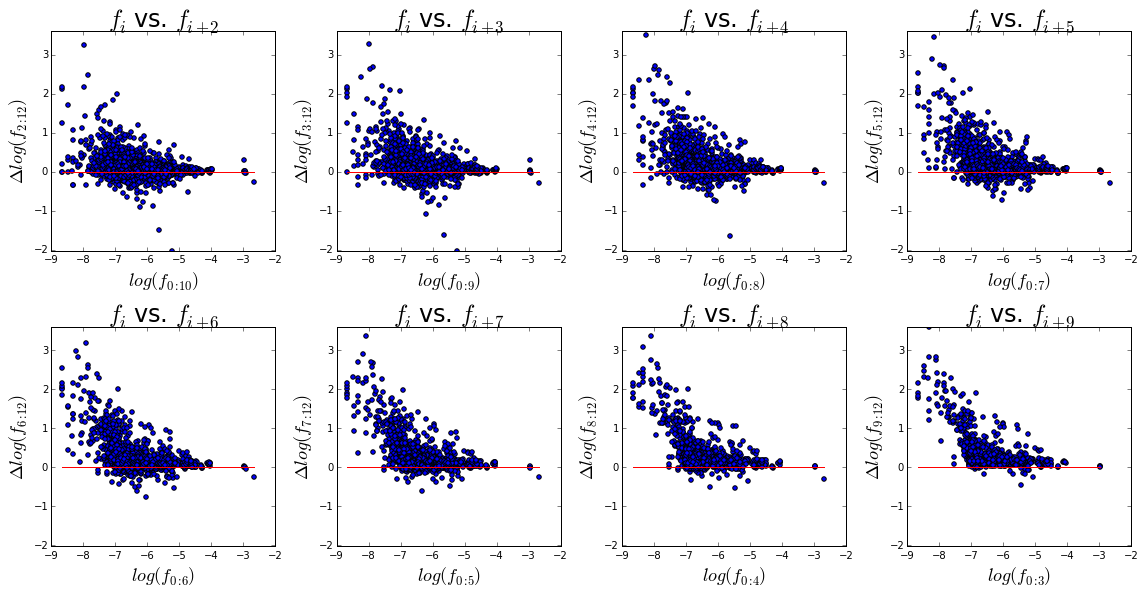

In [135]:
k_range = range(2, 10)
N = tf.shape[1]
growth_tf = tf.loc[growth_words_manual]
growth_tf.dropna(inplace=True)
# smooth and log
growth_tf_smooth = growth_tf[growth_tf > 0].min().min()
growth_tf_smooth = pd.np.log10(growth_tf + growth_tf_smooth)
cols = 4
rows = int(N / cols) + 1
size = 4
plt.figure(figsize=(cols * size, rows * size))
ymax = -100
ymin = 100
tf_1_deltas = {}
for k in k_range:
    tf_0 = growth_tf_smooth.ix[:, 0:N-k].values.flatten()
    tf_1 = growth_tf_smooth.ix[:, k:N].values.flatten()
    tf_1_delta = tf_1 - tf_0
    tf_1_deltas[k] = tf_1_delta
    ymax = max(ymax, tf_1_delta.max())
    ymin = min(ymin, tf_1_delta.min())
for i, k in enumerate(k_range):
    tf_0 = growth_tf_smooth.ix[:, 0:N-k].values.flatten()
    tf_1_delta = tf_1_deltas[k]
    plt.subplot(rows, cols, i+1)
    plt.scatter(tf_0, tf_1_delta)
    plt.plot([tf_0.min(), tf_0.max()], [0, 0], 'r-')
    plt.xlabel('$log(f_{0:%d})$'%(N-k), fontsize=18)
    plt.ylabel('$\Delta{}log(f_{%d:%d})$'%(k, N), fontsize=18)
    plt.title('$f_{i}$ vs. $f_{i+%d}$'%(k), fontsize=24)
    plt.ylim((ymin, ymax))
plt.tight_layout()
plt.show()

Looks like the growth words with highest delta had low initial $f$, and higher $k$ values lead to more obvious growth: makes sense since we defined these words based on their frequency ratio $\frac{min(f_{9:12})}{max(f_{0:3})}$.

Figure out what the high/low $\Delta$ words are.

In [155]:
# convert matrix to word/date/tf format
all_dates = sorted(growth_tf.columns)
test = growth_tf_smooth.copy()
word_list = list(reduce(lambda x,y: x+y, [[g,]*N for g in growth_tf_smooth.index.tolist()]))
test.index = range(test.shape[0])
test = pd.DataFrame(test.stack().reset_index(level=0, drop=True).rename_axis('year'))# .reset_index()
test.rename(columns={0 : 'tf'}, inplace=True)
test['word'] = word_list
print(test.head())

               tf word
year                  
2015-06 -4.598427   af
2015-07 -4.526901   af
2015-08 -4.525891   af
2015-09 -4.511612   af
2015-10 -4.492213   af


In [168]:
k = 1
timespan = N-k
tf_0 = test.loc[all_dates[:timespan]]
tf_1 = test.loc[all_dates[k:]]
tf_1.index = tf_0.index
tf_1_delta = tf_1[['tf']] - tf_0[['tf']]
tf_1_delta.ix[:, 'word'] = tf_1['word']
tf_1_delta.sort_values('tf', inplace=True, ascending=False)
tf_1_delta.rename(columns={'tf' : 'tf_delta_%d'%(k)}, inplace=True)
tf_1_delta['tf_0'] = tf_0['tf'].values
print(tf_1_delta)

         tf_delta_1            word      tf_0
year                                         
2016-01    2.152436          drumpf -4.598427
2015-10    2.117252      crybullies -6.222787
2016-04    1.756050          waddup -4.837544
2015-08    1.754054          flowey -6.178941
2016-03    1.515048         respeck -7.265402
2015-12    1.451772         tronald -6.933285
2015-10    1.225678        suicider -6.714609
2016-04    1.133403         whaddup -4.123763
2015-06    1.120276   cuckservative -6.551763
2016-02    1.088289          drumpf -4.869268
2015-09    1.037202       shitsauce -6.888319
2015-12    0.895475          pupper -6.843702
2016-03    0.861547          respek -6.888319
2015-12    0.847229       shitsauce -6.776022
2015-06    0.816084      berniebots -4.937193
2016-01    0.806742          habibi -6.385402
2016-02    0.806058         modpost -6.060022
2016-01    0.799477       berniebot -5.009312
2016-01    0.777674        altspace -5.414107
2015-09    0.762024         fuckyo

Surprise: words with the highest change had a much lower initial value.

Same thing but comparing social diffusion $D_{U}, D_{S}, D_{T}$ and context diversity $C_{2}, C_{3}$ with frequency change.

In [170]:
user_diffusion = pd.read_csv('../../data/frequency/2015_2016_user_diffusion.tsv', sep='\t', index_col=0)
sub_diffusion = pd.read_csv('../../data/frequency/2015_2016_subreddit_diffusion.tsv', sep='\t', index_col=0)
thread_diffusion = pd.read_csv('../../data/frequency/2015_2016_thread_diffusion.tsv', sep='\t', index_col=0)
# c2 = pd.read_csv('../../data/frequency/2015_2016_2gram_resids.tsv', sep='\t', index_col=0)
# c3 = pd.read_csv('../../data/frequency/2015_2016_3gram_resids.tsv', sep='\t', index_col=0)

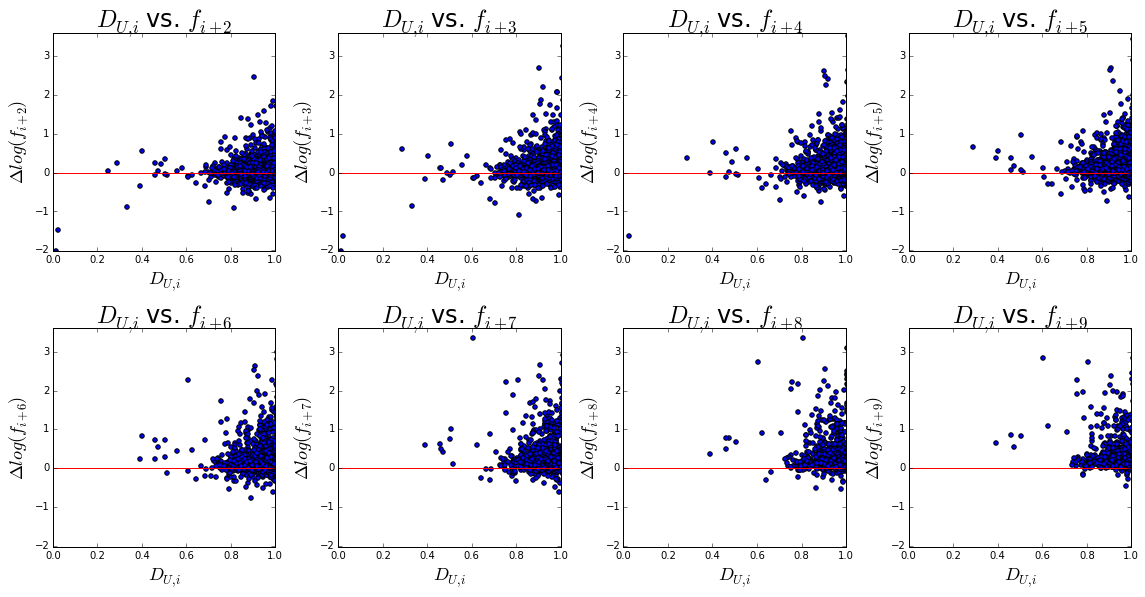

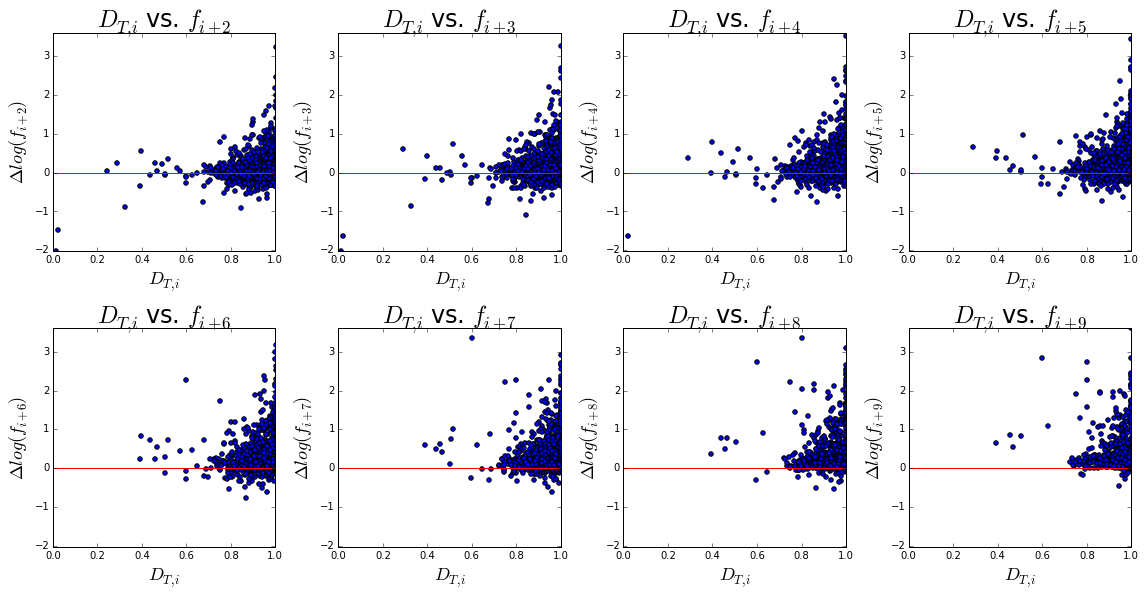

In [190]:
diffusion_names = ['U', 'S', 'T']
all_diffusion = [user_diffusion, sub_diffusion, thread_diffusion]
growth_words_manual = growth_tf_smooth.index.tolist()
xmin = 0.
xmax = 1.
ymax = -100
ymin = 100
tf_1_deltas = {}
for k in k_range:
    timespan = N-k
    tf_0 = growth_tf_smooth.ix[:, 0:timespan].values.flatten()
    tf_1 = growth_tf_smooth.ix[:, k:N].values.flatten()
    tf_1_delta = tf_1 - tf_0
    tf_1_deltas[k] = tf_1_delta
    ymax = max(ymax, tf_1_delta.max())
    ymin = min(ymin, tf_1_delta.min())
for diffusion_name, diffusion_vals in zip(diffusion_names, all_diffusion):
    growth_diffusion = diffusion_vals.loc[growth_words_manual]
    cols = 4
    rows = int(N / cols) + 1
    size = 4
    plt.figure(figsize=(cols * size, rows * size))
    for i, k in enumerate(k_range):
        timespan = N-k
        diffusion_label = '$D_{%s, i}$'%(diffusion_name)
        tf_label = 'f_{i+%d}'%(k)
        diffusion_0 = growth_diffusion.ix[:, 0:timespan].values.flatten()
        tf_1_delta = tf_1_deltas[k]
        plt.subplot(rows, cols, i+1)
        plt.scatter(diffusion_0, tf_1_delta)
        plt.plot([xmin, xmax], [0, 0], 'r-')
        plt.xlabel(diffusion_label, fontsize=18)
        plt.ylabel('$\Delta{}log(%s)$'%(tf_label), fontsize=18)
        plt.title('%s vs. $%s$'%(diffusion_label, tf_label), fontsize=24)
        plt.xlim((xmin, xmax))
        plt.ylim((ymin, ymax))
    plt.tight_layout()
    plt.show()

In [215]:
growth_tf_smooth.index

Index([u'af', u'asf', u'hella', u'lowkey', u'deadass', u'boutta', u'trynna',
       u'tbh', u'tbqh', u'ofc',
       ...
       u'psychs', u'comeup', u'mollys', u'loosies', u'insufflated',
       u'digestives', u'nooch', u'decarbed', u'pourover', u'supps'],
      dtype='object', length=330)

In [250]:
growth_tf_smooth_flat = growth_tf_smooth.copy()
growth_tf_smooth_flat = pd.DataFrame(growth_tf_smooth.stack(), columns=['tf'])
k = 1
timespan = N - k
# need list of tuples
tf_0_ix = [(w, d) for w in growth_words_manual for d in all_dates[0:timespan]]
tf_1_ix = [(w, d) for w in growth_words_manual for d in all_dates[k:]]
tf_0 = growth_tf_smooth_flat.ix[tf_0_ix]
tf_1 = growth_tf_smooth_flat.ix[tf_1_ix]
print(tf_0.shape)
print(tf_1.shape)
tf_0.index = tf_1.index
tf_1_delta = tf_1[['tf']] - tf_0[['tf']]
print(tf_1_delta.head())

(3630, 1)
(3630, 1)
                  tf
af 2015-07  0.071526
   2015-08  0.001010
   2015-09  0.014278
   2015-10  0.019399
   2015-11  0.025281


In [244]:
print(tf_1_delta.shape)

(3959, 1)


In [256]:
top_k = 20
for diffusion_name, diffusion_vals in zip(diffusion_names, all_diffusion):
    growth_words_overlap = list(set(growth_words_manual) & set(diffusion_vals.index))
    growth_tf_smooth_flat = pd.DataFrame(growth_tf_smooth.loc[growth_words_overlap].stack(), columns=['tf'])
    tf_0_ix = [(w, d) for w in growth_words_overlap for d in all_dates[0:timespan]]
    tf_1_ix = [(w, d) for w in growth_words_overlap for d in all_dates[k:]]
    tf_0 = growth_tf_smooth_flat.ix[tf_0_ix]
    tf_1 = growth_tf_smooth_flat.ix[tf_1_ix]
    tf_0.index = tf_1.index
    tf_1_delta = tf_1[['tf']] - tf_0[['tf']]
    user_diffusion_flat = pd.DataFrame(user_diffusion.loc[growth_words_overlap].stack(), columns=[diffusion_name])
    user_diffusion_flat = user_diffusion_flat.ix[tf_0_ix]
    user_diffusion_flat.index = tf_1_delta.index
    user_diffusion_flat['tf'] = tf_1_delta['tf']
    user_diffusion_flat.sort_values(diffusion_name, ascending=False, inplace=True)
    print(user_diffusion_flat.head(top_k))
    print(user_diffusion_flat.tail(top_k))

                               U        tf
booped         2016-01  1.059473 -0.012900
murked         2015-09  1.053739 -0.077720
respek         2016-02  1.052311  0.180333
cuckservatives 2015-11  1.051591  0.033543
trumpers       2016-01  1.051379  0.131533
lmfaoo         2015-07  1.050921  0.116142
screencapping  2015-09  1.050746  0.022167
murked         2016-03  1.047926  0.190248
thta           2015-08  1.046143  0.010554
booped         2015-10  1.045825  0.036494
hypebeasts     2015-07  1.045239  0.054336
preciate       2015-11  1.044084 -0.086814
tronald        2015-10  1.043985 -0.247449
memelord       2015-08  1.043951  0.143276
puppers        2016-01  1.043915 -0.198504
respeck        2016-04  1.042060  1.515048
playspace      2015-12  1.040395  0.201867
regressives    2015-10  1.039953  0.384512
hypebeasts     2015-10  1.039348  0.194532
shitsauce      2015-11  1.039139  0.672056
                           U        tf
mlem       2016-05  0.503792  0.285139
           2016-02 

Seems like the video game and political words are less diffuse than expected while the more "internet" slang words have higher diffusion.

Also frequency decreases are more likely with lower diffusion rates.

Plot $P(f_{w, i+1} < f_{\theta} | D_{i})$ at any given month $i$ for threshold frequency $f_{\theta}$ (i.e. whether higher dissemination leads to drop in frequency).

In [263]:
# first compute probabilities
bin_width = 0.1
bin_min = 0.
bin_max = 1.
n_bins = int((bin_max - bin_min) / bin_width + 1)
diffusion_bins = pd.np.linspace(bin_min, bin_max, n_bins)
tf_thresh = pd.np.percentile(tf.mean(axis=1), 10)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


## Context diversity

Same but with $C2$ and $C3$.